In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import scipy as sp
from scipy import stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Categorical Variables

LarkOwl (Does person like staying up late, waking up early, or it varies on their day?):

Lark (Wakes Up Early)

Neither (in between)

Owl (Stays Up at Night)

AlcoholUse (How much does that person drink?):

Abstain

Light

Moderate

DepressionStatus, AnxietyStatus, Stress (levels):

normal

moderate

severe

# Continous Variables (Numeric)

Gender: 0 = Female, 1 = Male

Class Year: 1 = First Year (Freshmen), 2 = Second Year (Sophomore), 3 = Third Year (Junior), 4 = Fourth Year (Senior)

NumEarlyClass (before 9 am): How many morning classes occur for that student?

EarlyClass: 0 = No Morning Class 1 = at least 1 morning class

GPA: Student's average GPA

ClassMissed = How many classes did the student miss?

CognitionZscore = The Z-score based on the skills for that student (higher scores indicate lackluster sleep).

StressScore = The student's stress level (higher scores indicate high stress).

DASScore = Depression + Anxiety + Stress

Happiness: The happier the person in life, the higher their score.

Drinks = How many drinks does this person drink normally?

WeekdayBed = What time does that person go to bed on average on weekdays? 25 = 1am, 25.33 = 1:20am

WeekdayRise = What time does that person wake up on average on weekdays?

WeekdaySleep = Mean of how many hours does that person get on average on weekdays?	

WeekendBed	= What time does that person go to bed on average on weekend days? 25 = 1am, 25:33 = 1:20am

WeekendRise	= What time does that person wake up on average on weekend days?

WeekendSleep = Mean of how many hours does that person get on average on weekend days?

AverageSleep = Mean of how many hours does that person get each night?

AllNighter = Did the person pull an all-nighter? 1 = Yes, 0 = No




I give credit to StatCrunch for allowing me to copy and paste the following data into csv: 

                                        Works Cited
                                           
                                         References
                                         

Onyper, S., Thacher, P., Gilbert, J., and Gradess, S., ‘‘Class Start Times, Sleep, and Academic Performance in College: A Path Analysis,’’ Chronobiology International, April 2012; 29(3): 318–335.

Rosesege. (2016, November 14). Sleep study on StatCrunch. Retrieved from https://www.statcrunch.com/app/index.php?dataid=2007549

In [2]:
df= pd.read_csv('SleepStudy.csv')
df.head()

,gender,classyear,larkowl,numearlyclass,earlyclass,gpa,classesmissed,cognitionzscore,poorsleepquality,depressionscore,...,alcoholuse,drinks,weekdaybed,weekdayrise,weekdaysleep,weekendbed,weekendrise,weekendsleep,averagesleep,allnighter
0,0,4,Neither,0,0,3.60,0,-0.26,4,4,...,Moderate,10,25.75,8.70,7.70,25.75,9.50,5.88,7.18,0
1,0,4,Neither,2,1,3.24,0,1.39,6,1,...,Moderate,6,25.70,8.20,6.80,26.00,10.00,7.25,6.93,0
2,0,4,Owl,0,0,2.97,12,0.38,18,18,...,Light,3,27.44,6.55,3.00,28.00,12.59,10.09,5.02,0
3,0,1,Lark,5,1,3.76,0,1.39,9,1,...,Light,2,23.50,7.17,6.77,27.00,8.00,7.25,6.90,0
4,0,4,Owl,0,0,3.20,4,1.22,9,7,...,Moderate,4,25.90,8.67,6.09,23.75,9.50,7.00,6.35,0


This is the relationship between those surveyed who use alcohol and have a GPA of at least 3.00 and the gender, what type of standing they are in college, how many early classes they have, the stress level score, poor quality sleep, and happiness score.

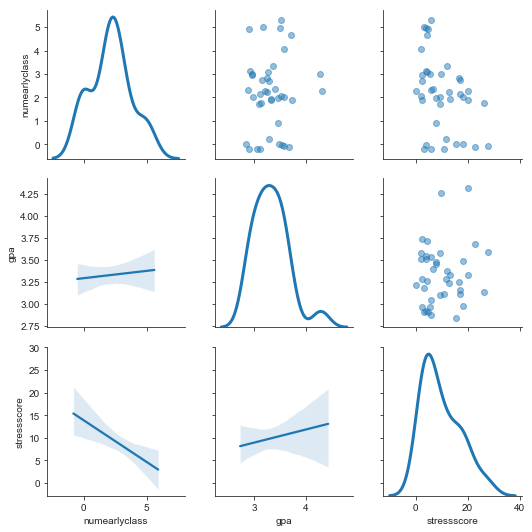

In [3]:
sns.set_style("ticks")

df_data = df.loc[
    ((df['alcoholuse'] == 'Abstain') | (df['alcoholuse'] == 'Light'))  & (df['gpa'] >= 3.0),
    ['gender', 'classyear', 'numearlyclass', 'gpa', 'stressscore', "poorsleepquality", 'happiness']]
    
df_jittered = df_data.loc[:, 'numearlyclass':'stressscore'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.34, .36, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)


g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.48)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

This is the relationship between those surveyed who use alcohol and have a GPA of 2.99 or below and the gender, what type of standing they are in college, how many early classes they have, the stress level score, poor quality sleep, and happiness score. 

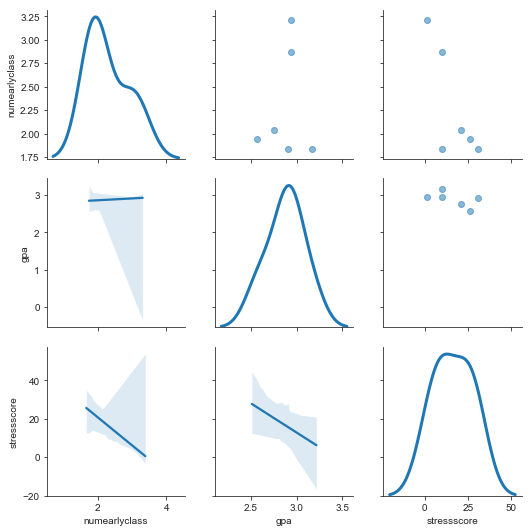

In [4]:
sns.set_style("ticks")

df_data = df.loc[
    ((df['alcoholuse'] == 'Moderate') | (df['alcoholuse'] == 'Heavy'))  & (df['gpa'] <= 2.99),
    ['gender', 'classyear', 'numearlyclass', 'gpa', 'stressscore', "poorsleepquality", 'happiness']]
    
df_jittered = df_data.loc[:, 'numearlyclass':'stressscore'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.35, .35, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)


g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.52)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()


                    gender  classyear  numearlyclass  earlyclass       gpa  \
gender            1.000000  -0.076144      -0.099747   -0.080713 -0.244577   
classyear        -0.076144   1.000000      -0.268725   -0.180652 -0.154805   
numearlyclass    -0.099747  -0.268725       1.000000    0.804650  0.101380   
earlyclass       -0.080713  -0.180652       0.804650    1.000000  0.079487   
gpa              -0.244577  -0.154805       0.101380    0.079487  1.000000   
classesmissed     0.131141   0.135365      -0.082841   -0.096245 -0.181543   
cognitionzscore  -0.206471  -0.001435       0.001013    0.097946  0.266822   
poorsleepquality  0.027084  -0.010596      -0.094431   -0.089490 -0.052230   
depressionscore   0.028844  -0.048064       0.023021   -0.052908  0.011918   
anxietyscore     -0.131882   0.040517      -0.028370   -0.086181  0.015644   
stressscore      -0.181306   0.083502       0.014043   -0.036226  0.199473   
dasscore         -0.118130   0.035435       0.006189   -0.063685

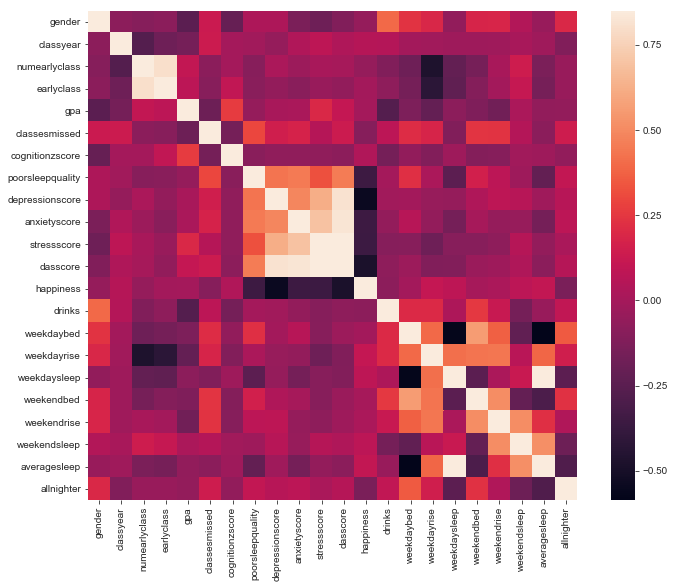

In [5]:
corrmat = df.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.85, square=True)
plt.show()

In [6]:
print(df.head())

print(df.alcoholuse.unique())

   gender  classyear  larkowl  numearlyclass  earlyclass   gpa  classesmissed  \
0       0          4  Neither              0           0  3.60              0   
1       0          4  Neither              2           1  3.24              0   
2       0          4      Owl              0           0  2.97             12   
3       0          1     Lark              5           1  3.76              0   
4       0          4      Owl              0           0  3.20              4   

   cognitionzscore  poorsleepquality  depressionscore     ...      alcoholuse  \
0            -0.26                 4                4     ...        Moderate   
1             1.39                 6                1     ...        Moderate   
2             0.38                18               18     ...           Light   
3             1.39                 9                1     ...           Light   
4             1.22                 9                7     ...        Moderate   

   drinks weekdaybed weekd

In [7]:
features = pd.get_dummies(df['alcoholuse'])

features['Moderate'] = np.where((df['alcoholuse'].isin(['Light', 'Heavy'])), 1, 0)

print(pd.crosstab(features['Moderate'], df['alcoholuse']))

alcoholuse  Abstain  Heavy  Light  Moderate
Moderate                                   
0                34      0      0       120
1                 0     16     83         0


In [8]:
features['GPAbelow3.0'] = np.where(df['gpa']>3.0, 1, 0)

print(df['gpa'].groupby(features['GPAbelow3.0']).describe())

             count      mean       std   min   25%  50%  75%  max
GPAbelow3.0                                                      
0             79.0  2.771899  0.256920  2.00  2.63  2.8  3.0  3.0
1            174.0  3.458046  0.245895  3.04  3.25  3.4  3.6  4.0


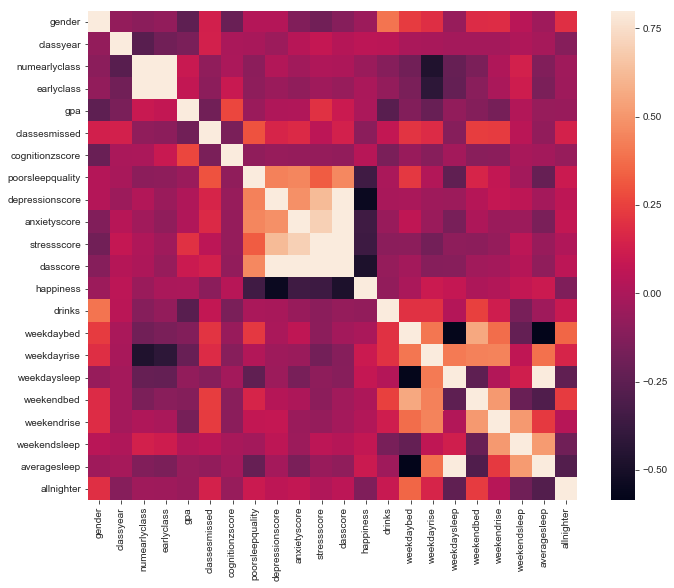

             stressscore  happiness       gpa    gender
stressscore     1.000000  -0.359518  0.199473  0.512531
happiness      -0.359518   1.000000  0.002940  0.392608
gpa             0.199473   0.002940  1.000000  0.733699
gender          0.512531   0.392608  0.733699  1.000000


In [9]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df[['stressscore','happiness','gpa']].mean(axis=0)
stds = df[['stressscore','happiness','gpa']].std(axis=0)
features['gender'] = ((df[['stressscore','happiness','gpa']] - means) / stds).mean(axis=1)

plotdf = df.loc[:, ['stressscore','happiness','gpa']]
plotdf['gender'] = features['gender'] 
corrmat2 = plotdf.corr()

print(corrmat2)

In [10]:
for col in df.columns:
    print('There are {} unique variables for {}.'.format((len(df[col].unique())), col))

There are 2 unique variables for gender.
There are 4 unique variables for classyear.
There are 3 unique variables for larkowl.
There are 6 unique variables for numearlyclass.
There are 2 unique variables for earlyclass.
There are 62 unique variables for gpa.
There are 15 unique variables for classesmissed.
There are 160 unique variables for cognitionzscore.
There are 16 unique variables for poorsleepquality.
There are 27 unique variables for depressionscore.
There are 24 unique variables for anxietyscore.
There are 32 unique variables for stressscore.
There are 3 unique variables for depressionstatus.
There are 3 unique variables for anxietystatus.
There are 2 unique variables for stress.
There are 61 unique variables for dasscore.
There are 27 unique variables for happiness.
There are 4 unique variables for alcoholuse.
There are 18 unique variables for drinks.
There are 98 unique variables for weekdaybed.
There are 138 unique variables for weekdayrise.
There are 150 unique variables f

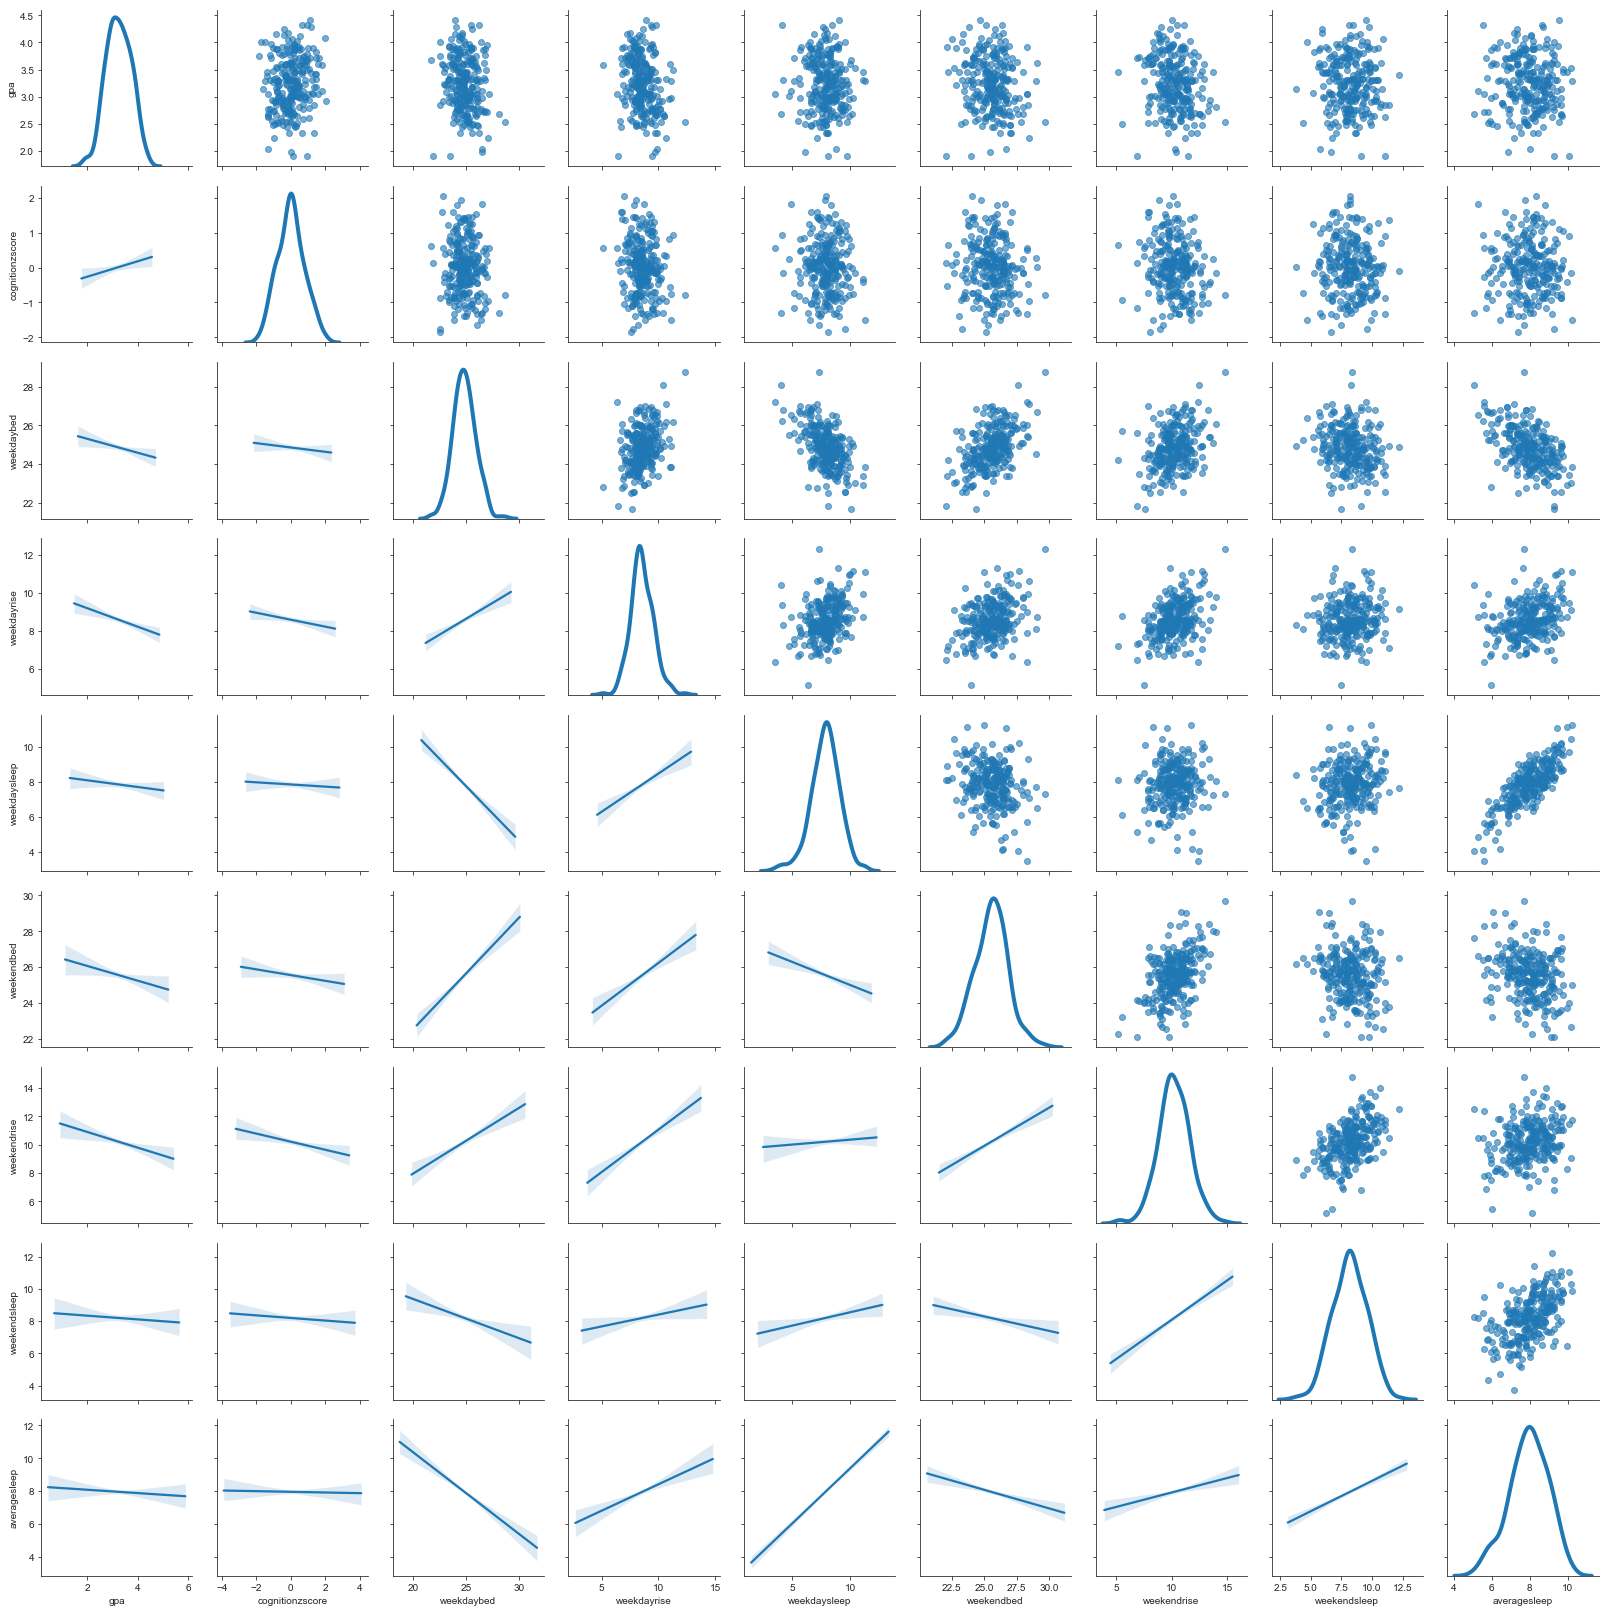

In [11]:
continous = df.loc[:, ['gpa', 'cognitionzscore', 'weekdaybed', 'weekdayrise', 'weekdaysleep', 'weekendbed', 'weekendrise', 'weekendsleep', 'averagesleep'
]]

sns.set_style('ticks')

jitter = pd.DataFrame(
    np.random.uniform(-.6, .6, size=(continous.shape)),
    columns = continous.columns
)

continous = continous.add(jitter)

g = sns.PairGrid(continous.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.6)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=4)
plt.show()

                      gpa  cognitionzscore  weekdaybed  weekdayrise  \
gpa              1.000000         0.141693   -0.166112    -0.243249   
cognitionzscore  0.141693         1.000000   -0.080870    -0.143385   
weekdaybed      -0.166112        -0.080870    1.000000     0.359901   
weekdayrise     -0.243249        -0.143385    0.359901     1.000000   
weekdaysleep    -0.076383        -0.038639   -0.536660     0.349166   
weekendbed      -0.156794        -0.095715    0.512604     0.365087   
weekendrise     -0.191563        -0.154849    0.346666     0.416040   
weekendsleep    -0.040815        -0.044747   -0.185562     0.103873   
averagesleep    -0.048901        -0.015264   -0.517896     0.311466   

                 weekdaysleep  weekendbed  weekendrise  weekendsleep  \
gpa                 -0.076383   -0.156794    -0.191563     -0.040815   
cognitionzscore     -0.038639   -0.095715    -0.154849     -0.044747   
weekdaybed          -0.536660    0.512604     0.346666     -0.185562   
w

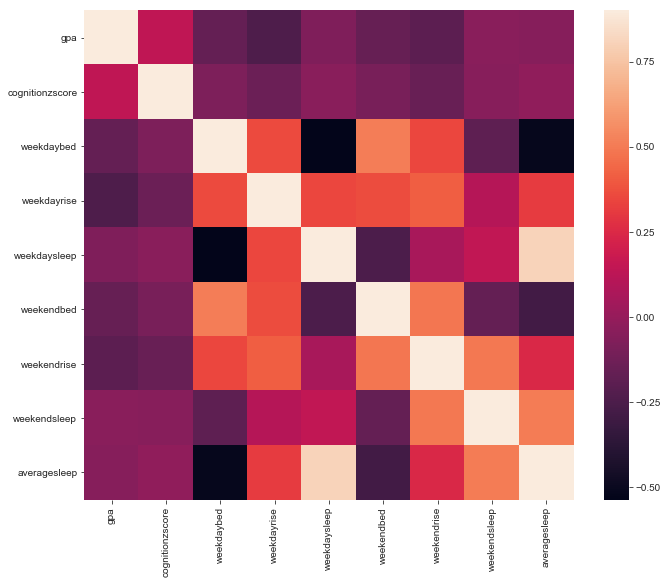

In [12]:
corrmat = continous.corr()
print(corrmat)

f, ax = plt.subplots(figsize = (11,9))

sns.heatmap(corrmat, vmax=.90, square=True)
plt.show()

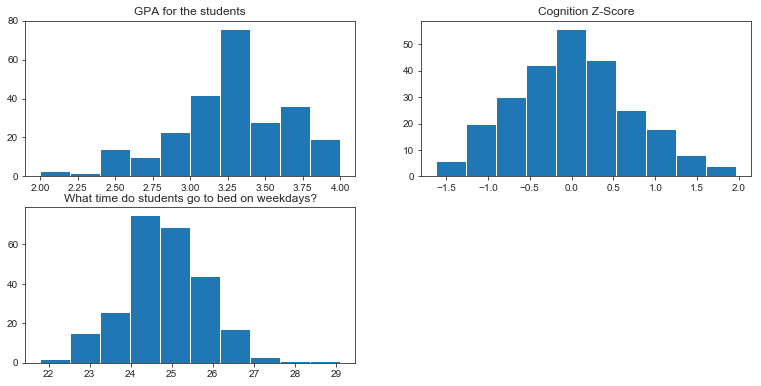

In [13]:
f, ax = plt.subplots(figsize=(13,20))
norm = sorted(np.random.normal(0,1,2886))

plt.subplot(6,2,1)
plt.hist(df['gpa'])
plt.title('GPA for the students')

plt.subplot(6,2,2)
plt.hist(df['cognitionzscore'])
plt.title('Cognition Z-Score')

plt.subplot(6,2,3)
plt.hist(df['weekdaybed'])
plt.title('What time do students go to bed on weekdays?')


plt.show()

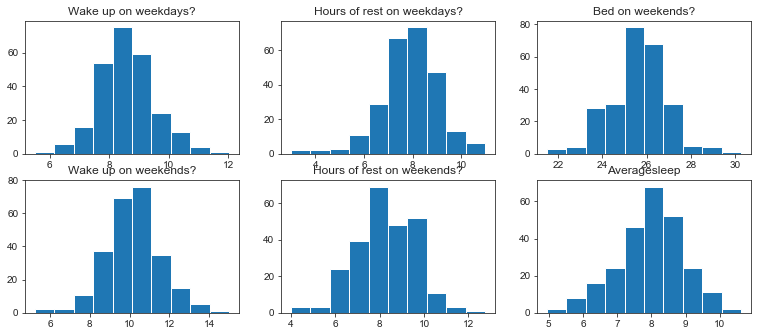

In [14]:
f, ax = plt.subplots(figsize=(13,20))
norm = sorted(np.random.normal(0,1,2887))

plt.subplot(7,3,1)
plt.hist(df['weekdayrise'])
plt.title('Wake up on weekdays?')

plt.subplot(7,3,2)
plt.hist(df['weekdaysleep'])
plt.title('Hours of rest on weekdays?')

plt.subplot(7,3,3)
plt.hist(df['weekendbed'])
plt.title('Bed on weekends?')

plt.subplot(7,3,4)
plt.hist(df['weekendrise'])
plt.title('Wake up on weekends?')

plt.subplot(7,3,5)
plt.hist(df['weekendsleep'])
plt.title('Hours of rest on weekends?')

plt.subplot(7,3,6)
plt.hist(df['averagesleep'])
plt.title('Averagesleep')

plt.show()

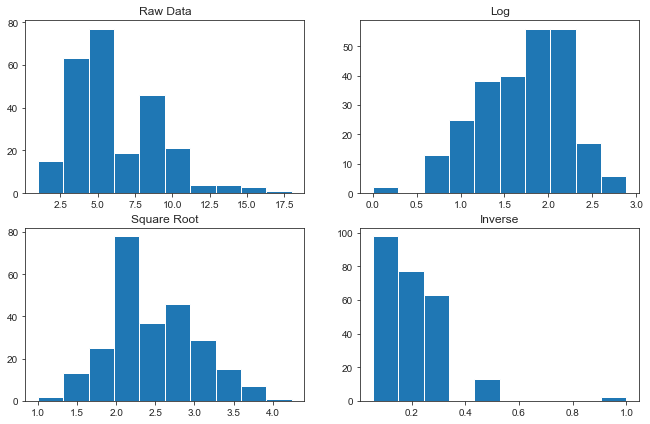

In [15]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(221)
plt.hist(df['poorsleepquality'])
plt.title('Raw Data')

fig.add_subplot(222)
plt.hist(np.log(df['poorsleepquality']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['poorsleepquality']))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1/df['poorsleepquality'])
plt.title('Inverse')

plt.show()

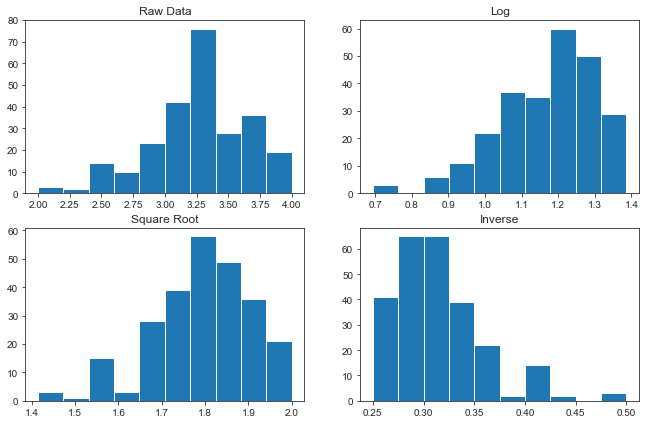

In [16]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(221)
plt.hist(df['gpa'])
plt.title('Raw Data')

fig.add_subplot(222)
plt.hist(np.log(df['gpa']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['gpa']))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1/df['gpa'])
plt.title('Inverse')

plt.show()

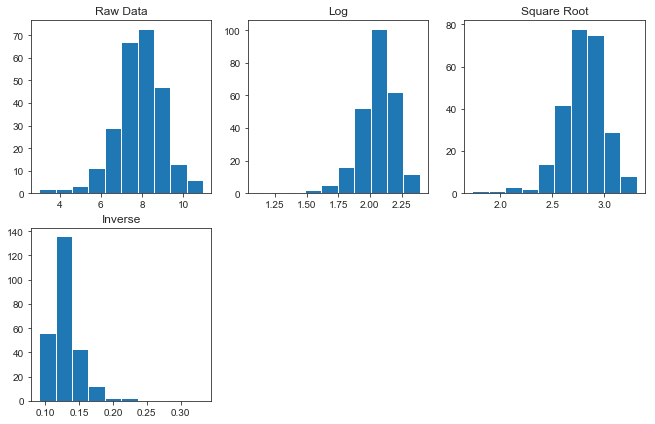

In [17]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekdaysleep'])
plt.title('Raw Data')

fig.add_subplot(232)
plt.hist(np.log(df['weekdaysleep']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekdaysleep']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekdaysleep'])
plt.title('Inverse')

plt.show()

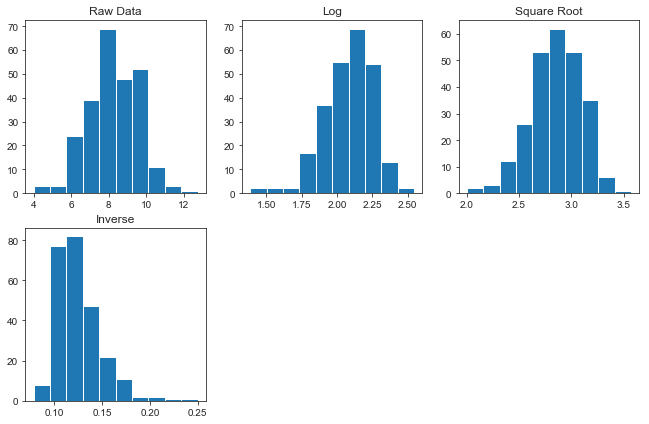

In [18]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekendsleep'])
plt.title('Raw Data')

fig.add_subplot(232)
plt.hist(np.log(df['weekendsleep']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekendsleep']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekendsleep'])
plt.title('Inverse')

plt.show()

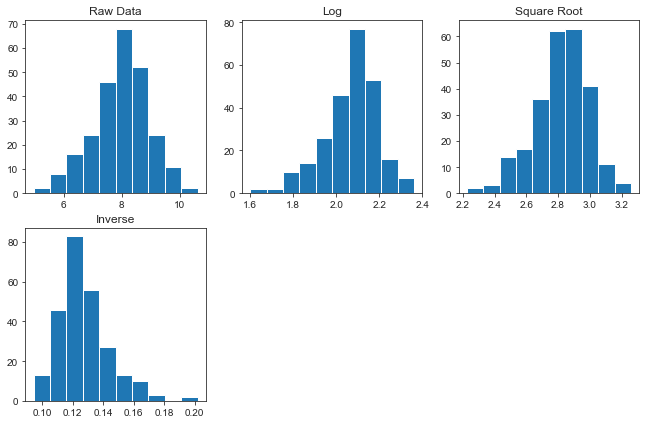

In [19]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['averagesleep'])
plt.title('Raw Data')

fig.add_subplot(232)
plt.hist(np.log(df['averagesleep']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['averagesleep']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['averagesleep'])
plt.title('Inverse')

plt.show()

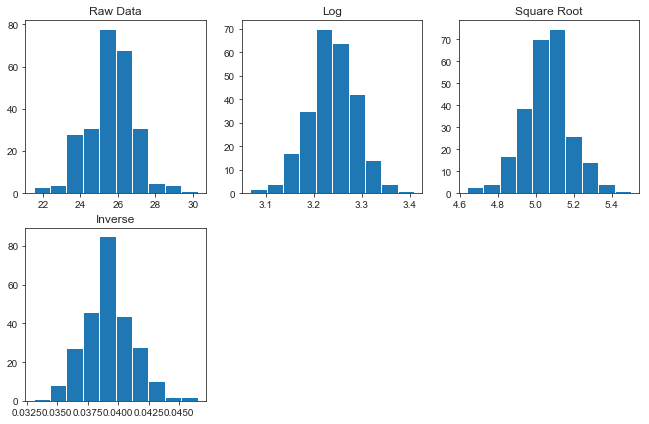

In [20]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekendbed'])
plt.title('Raw Data')

fig.add_subplot(232)
plt.hist(np.log(df['weekendbed']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekendbed']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekendbed'])
plt.title('Inverse')

plt.show()

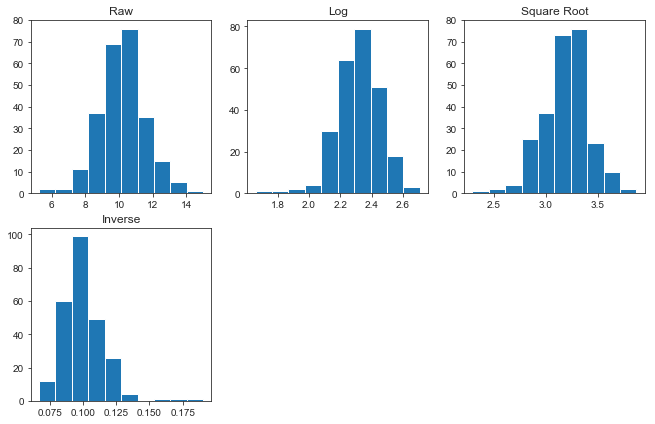

In [21]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekendrise'])
plt.title('Raw')

fig.add_subplot(232)
plt.hist(np.log(df['weekendrise']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekendrise']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekendrise'])
plt.title('Inverse')

plt.show()

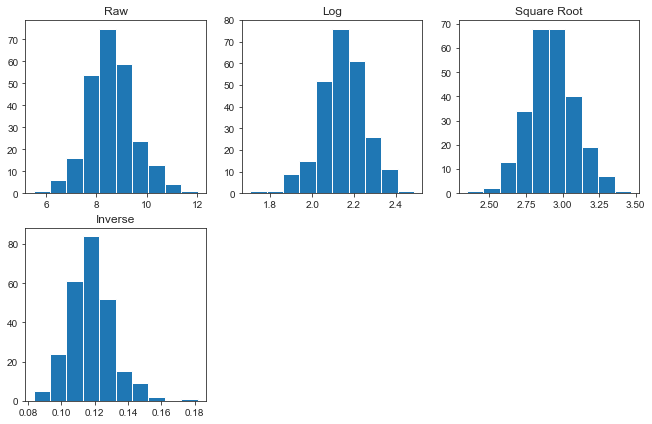

In [22]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekdayrise'])
plt.title('Raw')

fig.add_subplot(232)
plt.hist(np.log(df['weekdayrise']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekdayrise']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekdayrise'])
plt.title('Inverse')

plt.show()

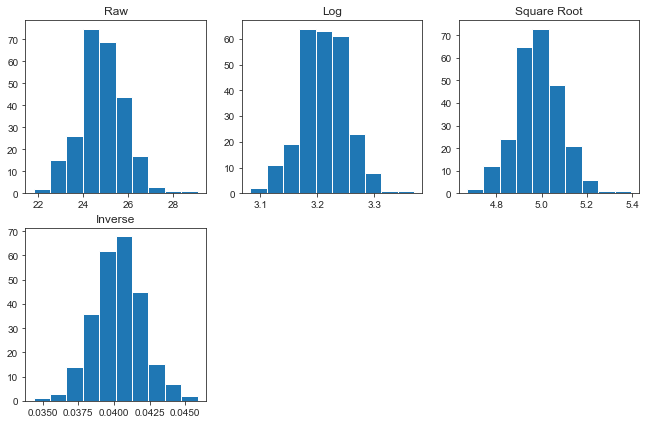

In [23]:
fig = plt.figure(figsize=(11,7))

fig.add_subplot(231)
plt.hist(df['weekdaybed'])
plt.title('Raw')

fig.add_subplot(232)
plt.hist(np.log(df['weekdaybed']))
plt.title('Log')

fig.add_subplot(233)
plt.hist(np.sqrt(df['weekdaybed']))
plt.title('Square Root')

fig.add_subplot(234)
plt.hist(1/df['weekdaybed'])
plt.title('Inverse')

plt.show()

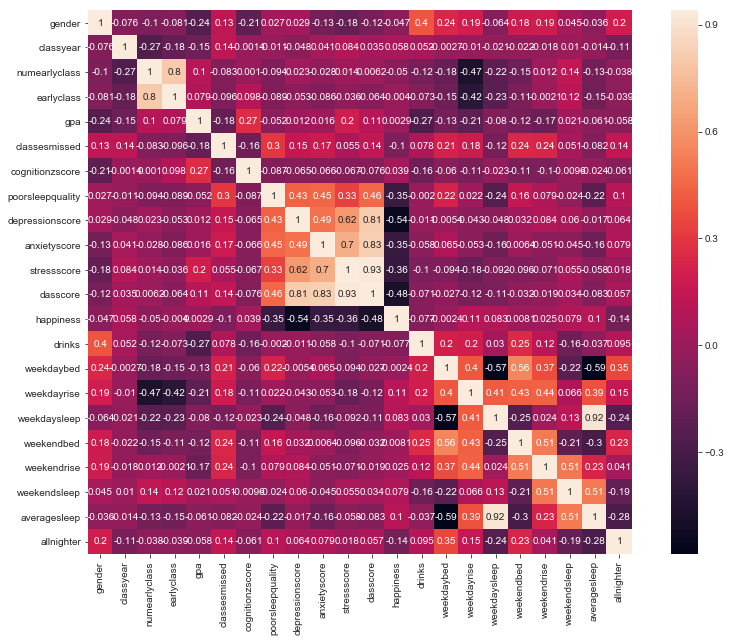

In [24]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(corrmat, annot=True, vmax=.94, square=True)
plt.show()

In [25]:
plotdf = df.loc[:, ['depressionscore', 'stressscore', 'dasscore']]
corrmat2 = plotdf.corr()
plt.show()
print(corrmat2)
print('These are variables that correlate the best. In other words, those variables have the highest correlation together. Therefore, I will be using those for Covariance Matrix and PCA.')

                 depressionscore  stressscore  dasscore
depressionscore         1.000000     0.621962  0.814469
stressscore             0.621962     1.000000  0.925670
dasscore                0.814469     0.925670  1.000000
These are variables that correlate the best. In other words, those variables have the highest correlation together. Therefore, I will be using those for Covariance Matrix and PCA.


In [26]:
df_pca = df.loc[:, ['depressionscore', 'stressscore', 'dasscore']]

In [27]:
X = StandardScaler().fit_transform(df_pca) 

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix below are:\n', Cx)

Covariance Matrix below are:
 [[1.00396825 0.62443    0.81770105]
 [0.62443    1.00396825 0.92934373]
 [0.81770105 0.92934373 1.00396825]]


In [29]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [30]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {} is: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {} is: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance for the three variables are',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1 is: 
[[-0.54202499]
 [-0.57304979]
 [-0.61467296]]
Eigenvalue 1 is: 2.5914378615944593
----------------------------------------
Eigenvector 2 is: 
[[-0.78456105]
 [ 0.60715791]
 [ 0.12579044]]
Eigenvalue 2 is: 0.3896290765114099
----------------------------------------
Eigenvector 3 is: 
[[-0.30111936]
 [-0.55043002]
 [ 0.77868731]]
Eigenvalue 3 is: 0.03083782379889376
----------------------------------------
The percentage of total variance for the three variables are [0.86039834 0.12936301 0.01023865]


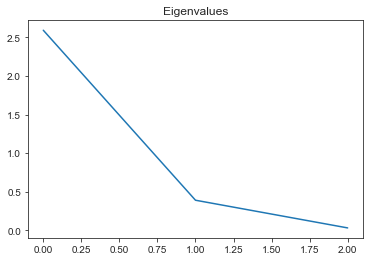

In [31]:
plt.plot(eig_val_cov)
plt.title('Eigenvalues')
plt.show()

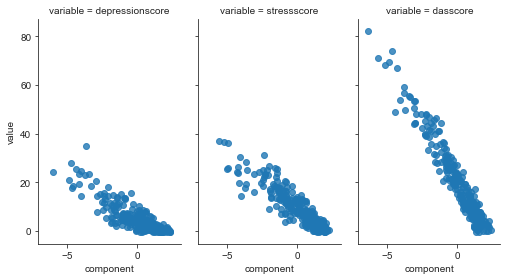

In [32]:
P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

data_to_plot = df_pca[['depressionscore', 'stressscore', 'dasscore']]
data_to_plot['component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='component')

g = sns.FacetGrid(data_to_plot, col='variable', height=4, aspect=.6)
g = g.map(
    sns.regplot,
    'component',
    'value',
    x_jitter=.55,
    y_jitter=.55,
    fit_reg=False
)
plt.show()